In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df.columns=['Age','Year','Nodes','Survival']

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

We have 3 features and 1 class label.

1) Age - Age of the patient at the time of operation.

2) Year - Year in which patient had an operation in 90's. If 64 is written it means 1964.

3) Nodes - Number of positive Axillary nodes detected. These are known as "Axillary lymph nodes" whose function is to filter fluids before they are eventually released into the bloodstream. Having a Cancer cells in Nodes tells us that the cancer might have spread to other body parts also.

4) Survival status - This is target variable, having two values 1 and 2. 1 indicates : The patient survived 5 years or longer post operation. 2 indicates : The patient died with 5 years.

In [4]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# AGENDA : Given a patient with the Some Age, Year of Operation and number of Lymph nodes detected, we have to predict or conclude the chances whether the patient will live less then 5 years or more then 5 years.

In [5]:
df.shape

(305, 4)

In [6]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    288
True      17
dtype: int64

In [8]:
#we will not remove the duplicates, as these can be a genuine possibility

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
df.Survival.value_counts()

1    224
2     81
Name: Survival, dtype: int64

In [11]:
df=df.replace([1,2],[0,1])

In [12]:
df.Survival.value_counts()

0    224
1     81
Name: Survival, dtype: int64

In [13]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [14]:
# MIN(AGE)=30 , MAX(AGE)=83 , Year=[1958,1969], Nodes=[0,52], Survival=[0,1]
# Nodes have Higher Count Density between 0 and 4(75% percentile)

# UNIVARIATE ANALYSIS

## 1. Survival

In [15]:
df.Survival.value_counts()

0    224
1     81
Name: Survival, dtype: int64

In [16]:
df.Survival.value_counts(1)

0    0.734426
1    0.265574
Name: Survival, dtype: float64

In [17]:
# There are only 27% people who will be living less then 5 years, which means the dataset is imbalanced.

<AxesSubplot:xlabel='Survival', ylabel='count'>

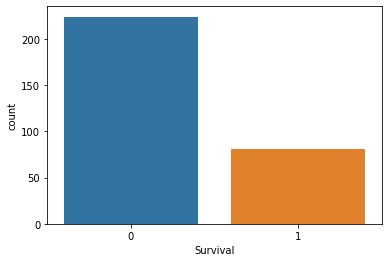

In [18]:
sns.countplot(x='Survival',data=df)

## 2. Age 

In [19]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<AxesSubplot:xlabel='Age', ylabel='Count'>

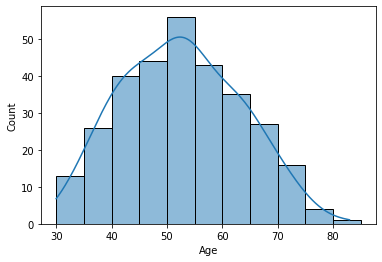

In [24]:
print(df.Age.skew())
sns.histplot(x='Age',data=df, binwidth=5, kde=True)

In [21]:
# THe Maximum people who were opereated where in the age group of 50 to 55.

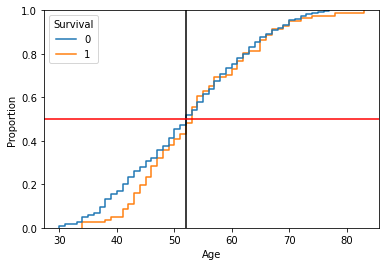

In [33]:
sns.ecdfplot(x='Age',data=df,hue='Survival')
plt.axvline(52,c='black')
plt.axhline(0.5,c='red');

In [29]:
# 80% of the people were 65 years or below.
# 50% of the people were 52 years or below.

## 3. Operation Year

<AxesSubplot:>

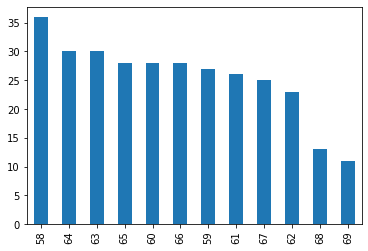

In [35]:
df.Year.value_counts().plot(kind='bar')

## 4. Lymph nodes

In [36]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<AxesSubplot:>

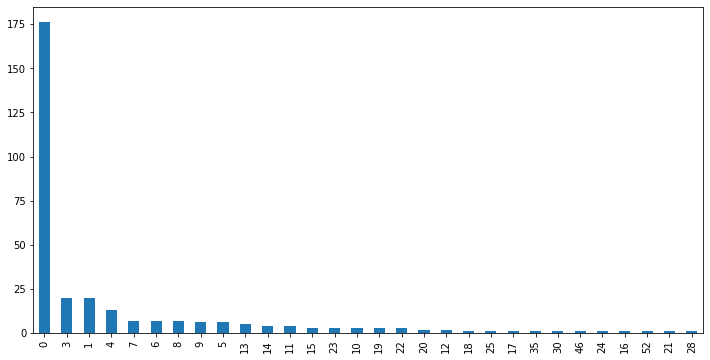

In [37]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')

2.940405369162834


<AxesSubplot:xlabel='Nodes', ylabel='Count'>

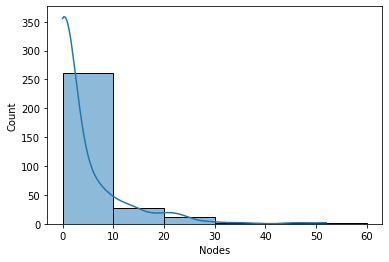

In [39]:
print(df.Nodes.skew())
sns.histplot(x='Nodes',data=df, binwidth=10, kde=True)

In [40]:
# Maximum Density Count for nodes is between 0 and 10.

# BIVARIATE ANALYSIS

In [46]:
#Age-Survival
#Age-Nodes-Survival
#Nodes-Survival
#Year-Survival
#Age-Nodes
#Year-Nodes
#Age-Years

<AxesSubplot:xlabel='Survival', ylabel='Age'>

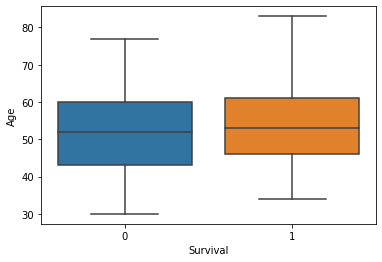

In [47]:
sns.boxplot(x='Survival',y='Age', data=df)

In [48]:
#People with age>77 will actually live lesser then 5 years
#People with age<35 will actually live more then 5 years

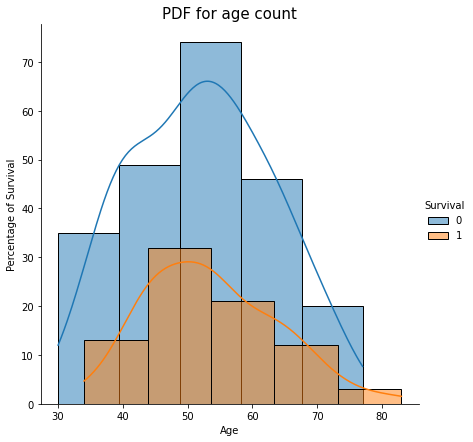

In [60]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.histplot,'Age',bins=5,kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count', size=15)
plt.show();

# Maximum % of people living lesser then 5 years are between 43 to 53.
# People between 30-33 years old are living more then 5 years.
# People with age>77 will actually live lesser then 5 years

In [57]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [58]:
df.Age.value_counts().sort_values(ascending=False)

52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: Age, dtype: int64

<Figure size 864x432 with 0 Axes>

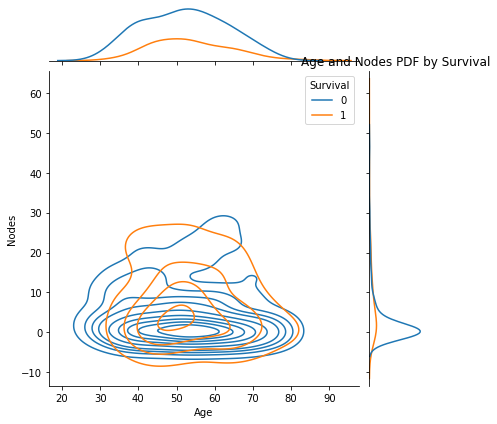

In [62]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Nodes',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show;

# AGE[43,53] and NODES[10-52] will live lesser then 5 years

<AxesSubplot:xlabel='Survival', ylabel='Nodes'>

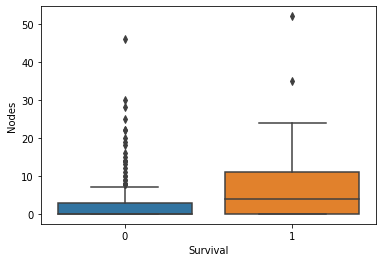

In [68]:
sns.boxplot(x='Survival',y='Nodes', data=df)

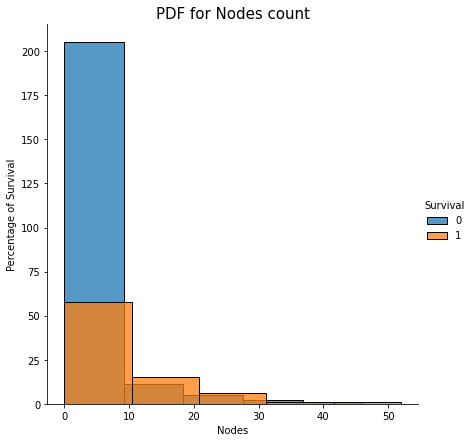

In [71]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.histplot,'Nodes',bins=5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes count', size=15)
plt.show();

In [72]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [73]:
df.Nodes.value_counts().sort_values(ascending=False)

0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: Nodes, dtype: int64

In [79]:
2/7

0.2857142857142857

0-15%
1-25%
3-35%
4-23%
5-67%
6-43%
7-29%
8-29%
9-67%
10-33%

13-80%
23-100%

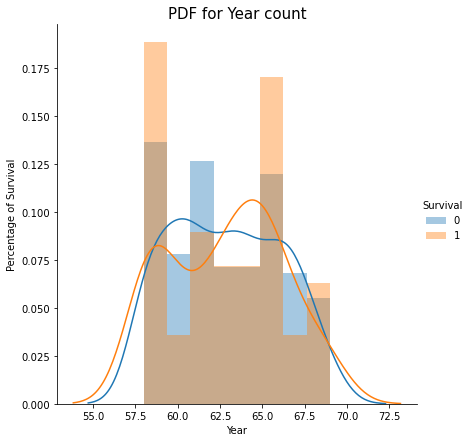

In [92]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.distplot,'Year',bins=8, kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count', size=15)
plt.show();

In [84]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


# 1965-46%
#1958-33%, 1959-45%, 
# 33% people died before 5 years when operated between 1965,66

<Figure size 864x432 with 0 Axes>

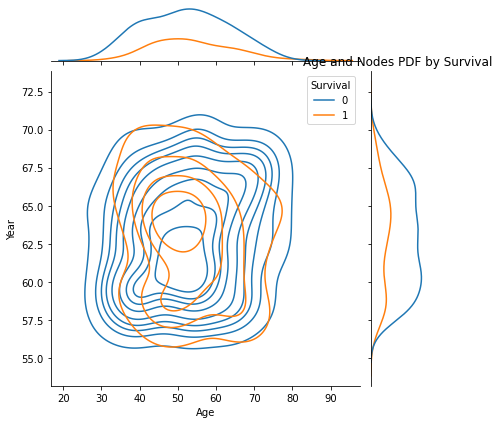

In [93]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Year',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show;

# MULTIVARIATE ANALYSIS

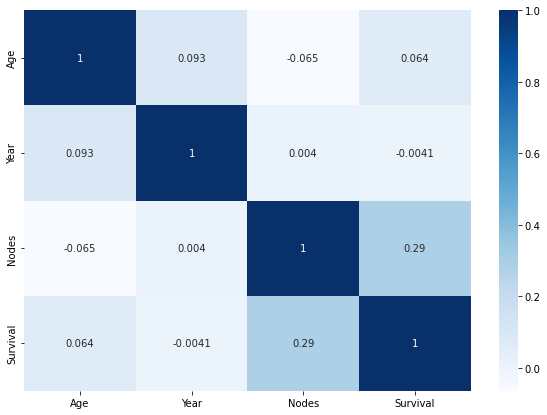

In [97]:
plt.figure(figsize=(10,7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues', annot=True);

# Nodes and Survival are corelated by 29%